## Import Modules 

In [93]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from sklearn.ensemble import RandomForestClassifier

## Preproccesing 

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [48]:
df = df.head(500) # using less no of rows for reducing time 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Training and Prediction 

##### 1. Training 

In [66]:
x = df.drop(columns=["quality"])
y = df["quality"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=1/3 ,random_state = 30)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train , y_train )


DecisionTreeClassifier()

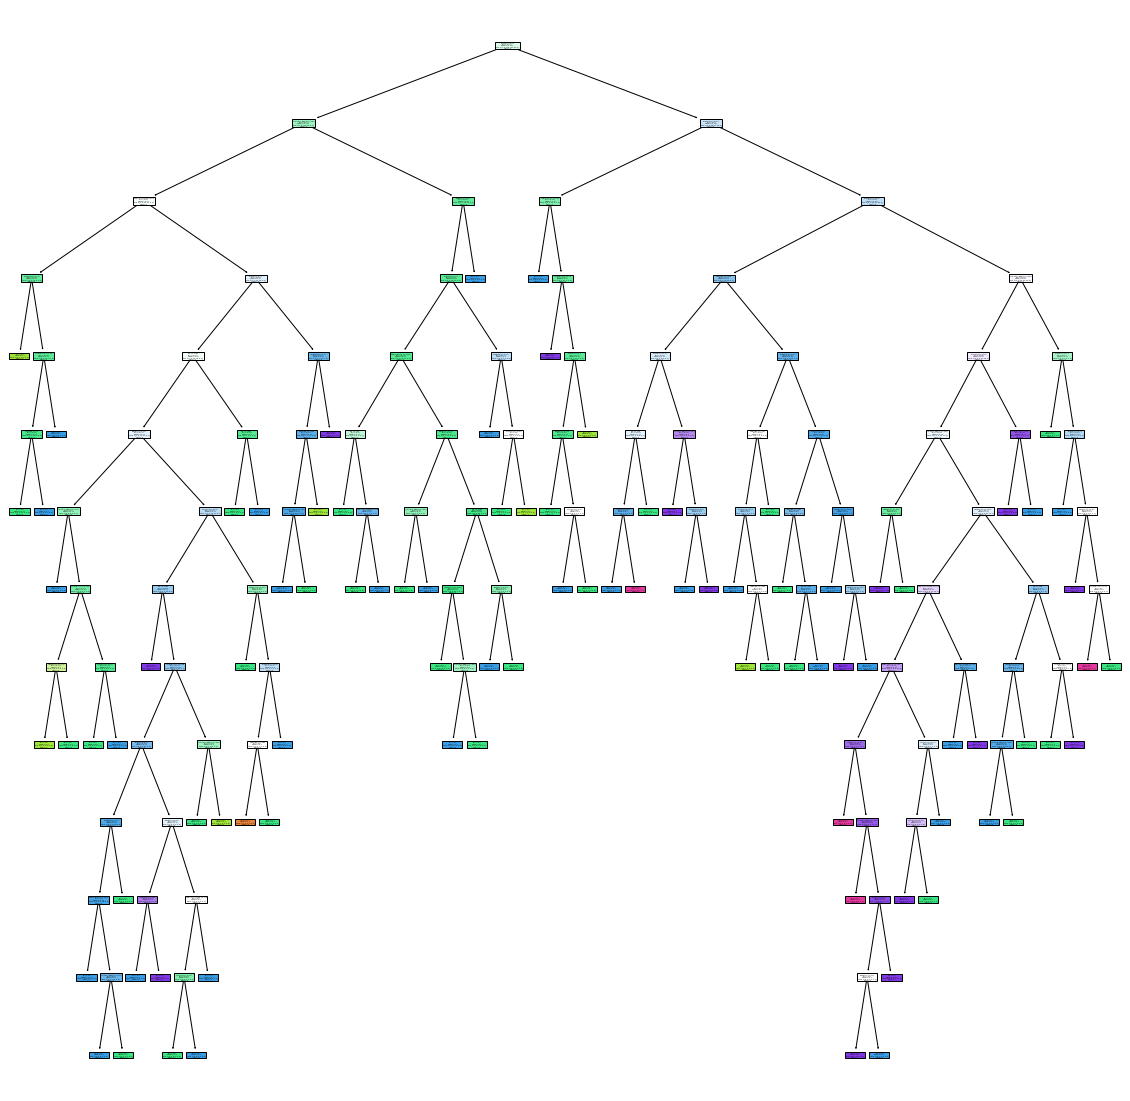

In [50]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True, class_names=[str(i) for i in set(y)] ,feature_names=x.columns)
plt.savefig('dt_model')

#### 2. Cost Complexity Pruning - (adressing problem of overfitting) 
Total Score = SSR + alpha * T 


SSR - squared summation 

T - no of leafs 

In [68]:
df1 = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
x1 = df1.drop(columns=["quality"])
y1 = df["quality"]
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1 , y1 , test_size=1/3 , random_state=30)


In [69]:
path = dt_model.cost_complexity_pruning_path(x ,y)
ccp_alpha = path.ccp_alphas

In [70]:
ccp_alpha.shape

(92,)

Text(0, 0.5, 'score')

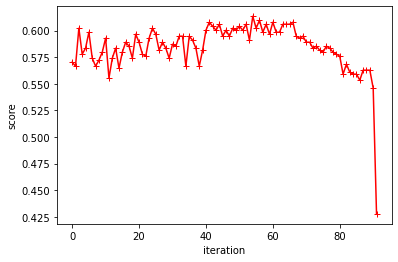

In [82]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x,y)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test1, y_test1))
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [74]:
train_score = [ i.score(x_train , y_train ) for i in dt_model2]
test_score = [i.score(x_test1 , y_test1) for i in dt_model2]

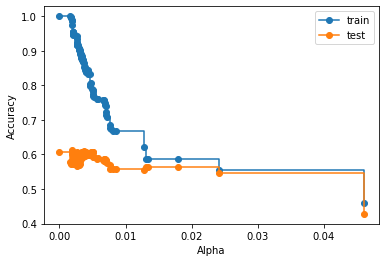

In [84]:
fig , ax = plt.subplots()
ax.plot(ccp_alpha , train_score  , label= "train" , drawstyle = "steps-post" , marker= "o")
ax.plot(ccp_alpha , test_score , label= "test" , drawstyle = "steps-post" , marker = "o")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()

##### Choose Value of alpha to be 0.14

[Text(0.4230769230769231, 0.9, 'X[10] <= 9.85\ngini = 0.634\nsamples = 333\nvalue = [13, 153, 125, 36, 6]'),
 Text(0.23076923076923078, 0.7, 'X[1] <= 0.548\ngini = 0.518\nsamples = 169\nvalue = [9, 107, 47, 6, 0]'),
 Text(0.15384615384615385, 0.5, 'X[9] <= 0.585\ngini = 0.572\nsamples = 85\nvalue = [2, 42, 36, 5, 0]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.322\nsamples = 26\nvalue = [1, 21, 4, 0, 0]'),
 Text(0.23076923076923078, 0.3, 'gini = 0.572\nsamples = 59\nvalue = [1, 21, 32, 5, 0]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.377\nsamples = 84\nvalue = [7, 65, 11, 1, 0]'),
 Text(0.6153846153846154, 0.7, 'X[9] <= 0.545\ngini = 0.66\nsamples = 164\nvalue = [4, 46, 78, 30, 6]'),
 Text(0.46153846153846156, 0.5, 'X[4] <= 0.08\ngini = 0.508\nsamples = 21\nvalue = [2, 14, 4, 1, 0]'),
 Text(0.38461538461538464, 0.3, 'gini = 0.656\nsamples = 8\nvalue = [2, 1, 4, 1, 0]'),
 Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.7692307692307693, 0.5,

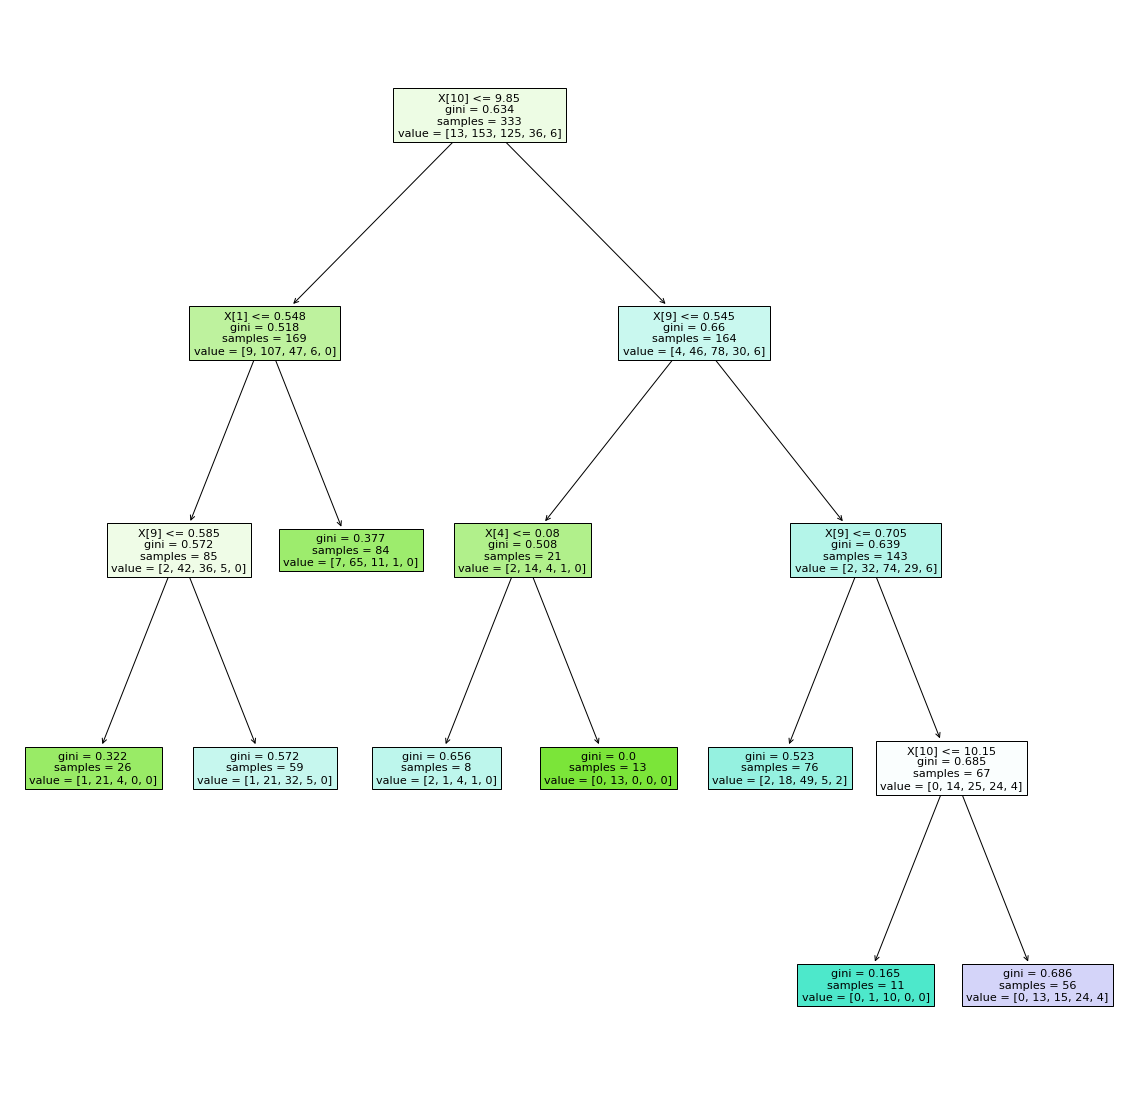

In [90]:
dt_model3 = DecisionTreeClassifier(ccp_alpha=0.014 , random_state=0)
dt_model3.fit(x_train , y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model3 , filled=True)

In [91]:
dt_model3.score(x_test1 , y_test1)

0.5422138836772983

### 3. Grid Search CV 

In [94]:
grid_pram = {
    "n_estimators" : [5,10 , 50 , 100 , 120 , 150],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(10),
    'min_samples_leaf' :range(10) 
}
# creating a model 
rf = RandomForestClassifier(n_estimators=5)
grid_serach_rf = GridSearchCV(param_grid= grid_pram, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)
grid_serach_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "F:\Anaconda\lib\site-packages\jo

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [95]:
grid_serach_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'n_estimators': 10}

In [97]:
dt_model_4 = DecisionTreeClassifier(criterion='entropy' , max_depth=7 ,min_samples_leaf=4 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [99]:
dt_model_4.fit(x_train , y_train)
print("Accuracy : " , dt_model_4.score(x_test , y_test))


Accuracy :  0.6107784431137725


##  Bagging Classifier 

In [100]:
from sklearn.ensemble import BaggingClassifier

In [107]:
bg_model = BaggingClassifier(DecisionTreeClassifier() , n_estimators=100)
bg_model.fit(x_train1 , y_train1 )
bg_model.score(x_test1 , y_test1)

0.6848030018761726

###### Using KNN 

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
bg_model2 = BaggingClassifier(KNeighborsClassifier(n_neighbors=5))
bg_model2.fit(x_train1 , y_train1 )
bg_model2.score(x_test1 , y_test1 )

0.5065666041275797

###### Using RandomForest

In [110]:
rf2 = RandomForestClassifier(n_estimators=5)
rf2.fit(x_train1 , y_train1)
rf2.score(x_test1 , y_test1)

0.6622889305816135